Generate plots based on parametric dataset (var alpha, fr and tau, 100 000 signals, 10 min length, spike_trains_3params_var_len600sec_100000.pkl)

In [1]:
import numpy as np
import pandas as pd
import pickle
import random
import joypy

from isttc.scripts.cfg_global import project_folder_path

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
dataset_folder = project_folder_path + 'results\\synthetic\\dataset\\'
results_folder = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau\\'
fig_folder = project_folder_path + 'results\\synthetic\\fig_drafts_paper\\'

In [68]:
save_fig = True

### Load data

In [5]:
with open(dataset_folder + '1_spike_trains_3params_var_len600sec_100000.pkl','rb') as f:
    data = pickle.load(f)

spike_trains = data['spike_trains']
alphas = data['alphas']
fr_values = data['fr_values']
taus_ms = data['tau_ms']
duration_ms = data['duration_ms']

print(f'n spike trains {len(spike_trains)}, len {spike_trains[0][-1]/1000}, duration_ms {duration_ms}')

fs = 1000

n spike trains 100000, len 598.8243581617338, duration_ms 600000


In [6]:
with open(results_folder + 'acf_isttc_full_50ms_20lags_dict.pkl', "rb") as f:
    isttc_full_dict = pickle.load(f)

with open(results_folder + 'acf_full_50ms_20lags_dict.pkl', "rb") as f:
    acf_full_dict = pickle.load(f)

print(f'len isttc_full_dict {len(isttc_full_dict)}')
print(f'len acf_full_dict {len(acf_full_dict)}')

len isttc_full_dict 100000
len acf_full_dict 100000


In [7]:
lv_df = pd.read_pickle(results_folder + 'lv_df.pkl')

In [9]:
lv_df

,unit_id,alpha,fr,tau_ms,lv
0,0,0.851099,7.741821,150.923515,1.307775
1,1,0.858098,4.394396,147.947233,1.345006
2,2,0.528805,8.587393,267.002290,1.068416
3,3,0.300692,6.976707,194.403797,1.055631
4,4,0.691458,0.950832,239.986489,1.357205
...,...,...,...,...,...
99995,99995,0.244627,2.672839,125.243251,1.178739
99996,99996,0.596987,5.754497,94.481295,1.353800
99997,99997,0.258915,5.604441,174.189672,1.064661
99998,99998,0.187620,1.219057,76.565797,1.306500


### Make summary dfs

In [10]:
def calculate_acf_decline_flag(acf_, start_idx=1, end_idx=4):
    acf_decay = np.all(np.diff(acf_[start_idx:end_idx]) <= 0)
    return acf_decay

In [13]:
data = []
for unit_id, unit_data in acf_full_dict.items():
    taus = unit_data['taus']  
    data.append({
        'unit_id': unit_id,
        'tau': taus['tau'],
        'tau_lower': taus['tau_lower'],
        'tau_upper': taus['tau_upper'],
        'fit_r_squared': taus['fit_r_squared'],
        'decline_150_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=4)
    })
acf_full_plot_df = pd.DataFrame(data)
acf_full_plot_df['tau_ms'] = acf_full_plot_df['tau'] * 50

rows_with_nans_df = acf_full_plot_df[acf_full_plot_df.isna().any(axis=1)]
n_rows_with_nan = len(rows_with_nans_df)
print(f'N rows with NaNs {n_rows_with_nan}')
acf_full_plot_df['method'] = 'acf_full'
acf_full_plot_df['fr'] = fr_values
acf_full_plot_df['alpha'] = alphas
acf_full_plot_df['tau_ms_true'] = taus_ms
acf_full_plot_df['tau_diff_abs'] = np.abs(acf_full_plot_df['tau_ms'] - acf_full_plot_df['tau_ms_true'])
acf_full_plot_df['tau_diff_rel'] = acf_full_plot_df['tau_diff_abs'] / acf_full_plot_df['tau_ms_true'] * 100
acf_full_plot_df['ci_width'] = np.abs(acf_full_plot_df['tau_upper'] - acf_full_plot_df['tau_lower'])
acf_full_plot_df['lv'] = lv_df['lv']

acf_full_plot_df

N rows with NaNs 11


,unit_id,tau,tau_lower,tau_upper,fit_r_squared,decline_150_250,tau_ms,method,fr,alpha,tau_ms_true,tau_diff_abs,tau_diff_rel,ci_width,lv
0,0,2.217899,2.119224,2.316575,0.998369,True,110.894975,acf_full,7.741821,0.851099,150.923515,40.028540,26.522401,0.197350,1.307775
1,1,2.568210,2.437150,2.699270,0.997899,True,128.410512,acf_full,4.394396,0.858098,147.947233,19.536721,13.205195,0.262120,1.345006
2,2,5.227451,4.334421,6.120482,0.984960,True,261.372568,acf_full,8.587393,0.528805,267.002290,5.629722,2.108492,1.786061,1.068416
3,3,3.950209,2.250084,5.650335,0.889719,True,197.510466,acf_full,6.976707,0.300692,194.403797,3.106670,1.598050,3.400250,1.055631
4,4,3.717963,3.426456,4.009471,0.995737,True,185.898174,acf_full,0.950832,0.691458,239.986489,54.088315,22.538067,0.583014,1.357205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2.227650,0.933793,3.521507,0.782254,True,111.382499,acf_full,2.672839,0.244627,125.243251,13.860751,11.067064,2.587713,1.178739
99996,99996,1.745627,1.639587,1.851666,0.996972,True,87.281338,acf_full,5.754497,0.596987,94.481295,7.199956,7.620510,0.212079,1.353800
99997,99997,2.994844,1.898804,4.090883,0.906062,True,149.742178,acf_full,5.604441,0.258915,174.189672,24.447494,14.034985,2.192079,1.064661
99998,99998,2.011821,1.072235,2.951407,0.846914,True,100.591044,acf_full,1.219057,0.187620,76.565797,24.025247,31.378564,1.879173,1.306500


In [ ]:
acf_full_plot_df.describe()

In [14]:
data = []
for unit_id, unit_data in isttc_full_dict.items():
    taus = unit_data['taus']      
    data.append({
        'unit_id': unit_id,
        'tau': taus['tau'],
        'tau_lower': taus['tau_lower'],
        'tau_upper': taus['tau_upper'],
        'fit_r_squared': taus['fit_r_squared'],
        'decline_150_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=4)
    })
isttc_full_plot_df = pd.DataFrame(data)
isttc_full_plot_df['method'] = 'isttc_full'
isttc_full_plot_df['tau_ms'] = isttc_full_plot_df['tau'] * 50

rows_with_nans_df = isttc_full_plot_df[isttc_full_plot_df.isna().any(axis=1)]
n_rows_with_nan = len(rows_with_nans_df)
print(f'N rows with NaNs {n_rows_with_nan}')

isttc_full_plot_df['method'] = 'isttc_full'
isttc_full_plot_df['fr'] = fr_values
isttc_full_plot_df['alpha'] = alphas
isttc_full_plot_df['tau_ms_true'] = taus_ms
isttc_full_plot_df['tau_diff_abs'] = np.abs(isttc_full_plot_df['tau_ms'] - isttc_full_plot_df['tau_ms_true'])
isttc_full_plot_df['tau_diff_rel'] = isttc_full_plot_df['tau_diff_abs'] / isttc_full_plot_df['tau_ms_true'] * 100
isttc_full_plot_df['ci_width'] = np.abs(isttc_full_plot_df['tau_upper'] - isttc_full_plot_df['tau_lower'])
isttc_full_plot_df['lv'] = lv_df['lv']

isttc_full_plot_df.head(2)

N rows with NaNs 0


,unit_id,tau,tau_lower,tau_upper,fit_r_squared,decline_150_250,method,tau_ms,fr,alpha,tau_ms_true,tau_diff_abs,tau_diff_rel,ci_width,lv
0,0,2.523412,2.362379,2.684445,0.996707,True,isttc_full,126.170618,7.741821,0.851099,150.923515,24.752897,16.400954,0.322066,1.307775
1,1,2.834326,2.688470,2.980182,0.997916,True,isttc_full,141.716309,4.394396,0.858098,147.947233,6.230924,4.211585,0.291712,1.345006


In [ ]:
isttc_full_plot_df.describe()

In [15]:
# check for NaNs 

rows_with_nans_acf_df = acf_full_plot_df[acf_full_plot_df.isna().any(axis=1)]
n_rows_with_nan_acf = len(rows_with_nans_acf_df)
print(f'N rows with NaNs {n_rows_with_nan_acf}')

rows_with_nans_isttc_df = isttc_full_plot_df[isttc_full_plot_df.isna().any(axis=1)]
n_rows_with_nan_isttc = len(rows_with_nans_isttc_df)
print(f'N rows with NaNs {n_rows_with_nan_isttc}')

# take from isttc dataset only rows where acf df has no NaNs
isttc_full_plot_df = isttc_full_plot_df[~isttc_full_plot_df['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]
acf_full_plot_df = acf_full_plot_df[~acf_full_plot_df['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]

print(f'len acf_full_plot_df {len(acf_full_plot_df)}, len isttc_full_plot_df {len(isttc_full_plot_df)}')

N rows with NaNs 34
N rows with NaNs 34
len acf_full_plot_df 99966, len isttc_full_plot_df 99966


In [16]:
# check for negative R-square

rows_with_negr_acf_df = acf_full_plot_df.query('fit_r_squared < 0')
n_rows_with_negr_acf = len(rows_with_negr_acf_df)
print(f'N rows with neg R {n_rows_with_negr_acf}')


rows_with_negr_isttc_df = isttc_full_plot_df.query('fit_r_squared < 0')
n_rows_with_negr_isttc = len(rows_with_negr_isttc_df)
print(f'N rows with neg R {n_rows_with_negr_isttc}')

acf_negr_unit_ids = rows_with_negr_acf_df['unit_id'].values
isttc_negr_unit_ids = rows_with_negr_isttc_df['unit_id'].values

unit_ids_negr_union = set(acf_negr_unit_ids).union(isttc_negr_unit_ids)
print(f'N rows in unit_ids_negr_union {len(unit_ids_negr_union)}')

isttc_full_plot_df = isttc_full_plot_df[~isttc_full_plot_df['unit_id'].isin(unit_ids_negr_union)]
acf_full_plot_df = acf_full_plot_df[~acf_full_plot_df['unit_id'].isin(unit_ids_negr_union)]

print(f'len acf_full_plot_df {len(acf_full_plot_df)}, len isttc_full_plot_df {len(isttc_full_plot_df)}')

N rows with neg R 214
N rows with neg R 215
N rows in unit_ids_negr_union 308
len acf_full_plot_df 99658, len isttc_full_plot_df 99658


In [17]:
tau_plot_long_df = pd.concat([acf_full_plot_df, isttc_full_plot_df])
tau_plot_long_df.reset_index(inplace=True, drop=True)

print(f'len tau_plot_long_df {len(tau_plot_long_df)}')

len tau_plot_long_df 199316


In [31]:
tau_plot_wide_df = acf_full_plot_df.merge(isttc_full_plot_df, suffixes=('_acf', '_isttc'), on=['unit_id','fr', 'lv', 'alpha', 'tau_ms_true'], how='left')
tau_plot_wide_df.reset_index(inplace=True, drop=True)

print(f'len tau_plot_wide_df {len(tau_plot_wide_df)}')

tau_plot_wide_df.columns

len tau_plot_wide_df 99658


Index(['unit_id', 'tau_acf', 'tau_lower_acf', 'tau_upper_acf',
       'fit_r_squared_acf', 'decline_150_250_acf', 'tau_ms_acf', 'method_acf',
       'fr', 'alpha', 'tau_ms_true', 'tau_diff_abs_acf', 'tau_diff_rel_acf',
       'ci_width_acf', 'lv', 'tau_isttc', 'tau_lower_isttc', 'tau_upper_isttc',
       'fit_r_squared_isttc', 'decline_150_250_isttc', 'method_isttc',
       'tau_ms_isttc', 'tau_diff_abs_isttc', 'tau_diff_rel_isttc',
       'ci_width_isttc'],
      dtype='object')

In [ ]:
tau_plot_wide_df

### Export for stats

In [19]:
tau_plot_long_df.to_csv(results_folder + 'tau_plot_long_df_with_lv.csv')

### Plots

In [20]:
tau_plot_long_df.groupby(by='method', as_index=False)['tau_diff_rel'].median()

,method,tau_diff_rel
0,acf_full,13.881182
1,isttc_full,12.613595


In [21]:
tau_plot_long_df['tau_diff_rel_log10'] = np.log10(tau_plot_long_df['tau_diff_rel'])

In [24]:
color_acf_full = '#718190'
color_isttc_full = '#14a9e2' 

In [38]:
tau_plot_wide_df['lv'].describe()

count    99658.000000
mean         1.249631
std          0.173513
min          0.556802
25%          1.103612
50%          1.230292
75%          1.363401
max          2.997069
Name: lv, dtype: float64

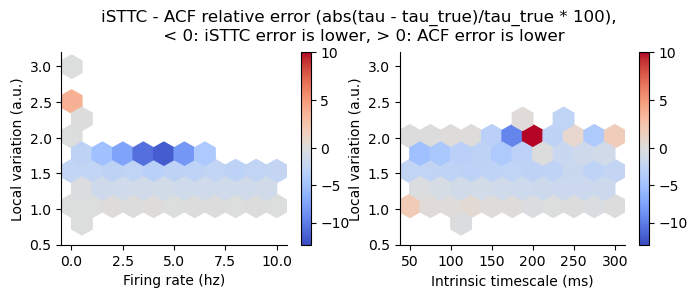

In [79]:
fig, axes = plt.subplots(1,2, figsize=(8,2.5))

norm = TwoSlopeNorm(vcenter=0)

hb0 = axes[0].hexbin(
    x=tau_plot_wide_df['fr'], y=tau_plot_wide_df['lv'],
    C=tau_plot_wide_df['tau_diff_rel_isttc'] - tau_plot_wide_df['tau_diff_rel_acf'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='coolwarm',
    norm = norm,
    mincnt=5                    
)

hb1 = axes[1].hexbin(
    x=tau_plot_wide_df['tau_ms_true'], y=tau_plot_wide_df['lv'],
    C=tau_plot_wide_df['tau_diff_rel_isttc'] - tau_plot_wide_df['tau_diff_rel_acf'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='coolwarm',
    norm = norm,
    mincnt=5  
)

vmin = np.floor(np.min([hb0.get_array().min(), hb1.get_array().min()]))
vmax = np.ceil(np.max([hb0.get_array().max(), hb1.get_array().max()]))
#print(vmin, vmax)

hb0.set_clim(vmin, vmax)
hb1.set_clim(vmin, vmax)

fig.colorbar(hb0, ax=axes[0], shrink=1)
fig.colorbar(hb1, ax=axes[1], shrink=1)

axes[0].set_xlabel('Firing rate (hz)')
axes[1].set_xlabel('Intrinsic timescale (ms)')
axes[1].set_xticks(np.linspace(50, 300, 6))

fig.suptitle('iSTTC - ACF relative error (abs(tau - tau_true)/tau_true * 100), \n < 0: iSTTC error is lower, > 0: ACF error is lower', y=1.05)

for ax in axes.flat:
    sns.despine(ax=ax)
    ax.set_ylabel('Local variation (a.u.)')
    ax.set_ylim([0.5, 3.2])
    #ax.set_yticks(np.linspace(0.1, 0.9, 5))

if save_fig:
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff_lv.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff_lv.svg' , bbox_inches='tight')

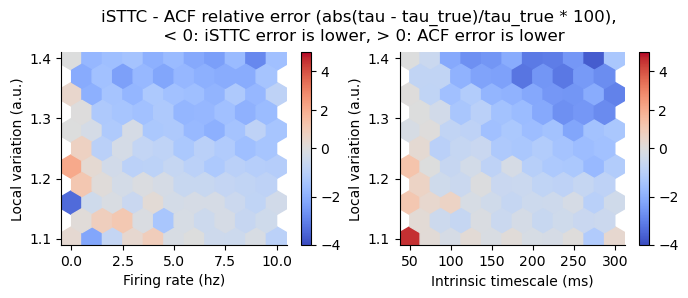

In [78]:
# 1st - 3rd quantiles
tau_plot_wide_df_lv_subset = tau_plot_wide_df.query('lv >= 1.1 and lv <= 1.4')

fig, axes = plt.subplots(1,2, figsize=(8,2.5))

norm = TwoSlopeNorm(vcenter=0)

hb0 = axes[0].hexbin(
    x=tau_plot_wide_df_lv_subset['fr'], y=tau_plot_wide_df_lv_subset['lv'],
    C=tau_plot_wide_df_lv_subset['tau_diff_rel_isttc'] - tau_plot_wide_df_lv_subset['tau_diff_rel_acf'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='coolwarm',
    norm = norm,
    mincnt=5                    
)

hb1 = axes[1].hexbin(
    x=tau_plot_wide_df_lv_subset['tau_ms_true'], y=tau_plot_wide_df_lv_subset['lv'],
    C=tau_plot_wide_df_lv_subset['tau_diff_rel_isttc'] - tau_plot_wide_df_lv_subset['tau_diff_rel_acf'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='coolwarm',
    norm = norm,
    mincnt=5  
)

vmin = np.floor(np.min([hb0.get_array().min(), hb1.get_array().min()]))
vmax = np.ceil(np.max([hb0.get_array().max(), hb1.get_array().max()]))
#print(vmin, vmax)

hb0.set_clim(vmin, vmax)
hb1.set_clim(vmin, vmax)

fig.colorbar(hb0, ax=axes[0], shrink=1)
fig.colorbar(hb1, ax=axes[1], shrink=1)

axes[0].set_xlabel('Firing rate (hz)')
axes[1].set_xlabel('Intrinsic timescale (ms)')
axes[1].set_xticks(np.linspace(50, 300, 6))

fig.suptitle('iSTTC - ACF relative error (abs(tau - tau_true)/tau_true * 100), \n < 0: iSTTC error is lower, > 0: ACF error is lower', y=1.05)

for ax in axes.flat:
    sns.despine(ax=ax)
    ax.set_ylabel('Local variation (a.u.)')
    ax.set_ylim([1.09, 1.41])
    #ax.set_yticks(np.linspace(0.1, 0.9, 5))

if save_fig:
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff_lv_subset.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff_lv_subset.svg' , bbox_inches='tight')

C:\Users\ipochino\AppData\Local\Temp\ipykernel_16712\2866651239.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(frameon=False)


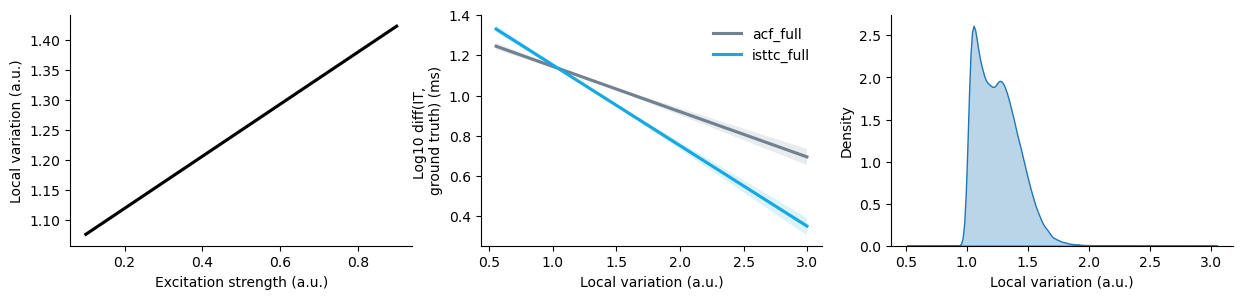

In [80]:
fig, axes = plt.subplots(1,3, figsize=(15, 3), sharey=False)

sns.regplot(x=tau_plot_wide_df['alpha'].values, y=tau_plot_wide_df['lv'], scatter=None, ax=axes[0], color='k')
axes[0].legend(frameon=False)

sns.regplot(x=tau_plot_wide_df['lv'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_acf']), scatter=None, ax=axes[1], 
            label='acf_full', color=color_acf_full)
sns.regplot(x=tau_plot_wide_df['lv'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_isttc']), scatter=None, ax=axes[1], 
            label='isttc_full', color=color_isttc_full)
axes[1].legend(frameon=False)

sns.kdeplot(
    data=tau_plot_wide_df, 
    x="lv", 
    fill=True, 
    alpha=0.3,
    ax=axes[2]
)

axes[0].set_xlabel('Excitation strength (a.u.)')
axes[0].set_ylabel('Local variation (a.u.)')

axes[1].set_xlabel('Local variation (a.u.)')
axes[1].set_ylabel('Log10 diff(IT, \nground truth) (ms)')

axes[2].set_xlabel('Local variation (a.u.)')

for ax in axes.flat:
    sns.despine(ax=ax)

if save_fig:
    plt.savefig(fig_folder + 'taus_dataset_fr_alpha_var_diff_regplot_lv.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_dataset_fr_alpha_var_diff_regplot_lv.svg' , bbox_inches='tight')